## 1. Importing Datasets

In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical

import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2. Working with files

In [2]:
Ravdess = "RAVDESS"
Crema = "CREMAD"
Tess = "TESS"
Savee = "SAVEE"

#### 2.1 RAVDESS Dataframe

In [3]:
ravdess_directory_list = os.listdir(Ravdess)
#print(ravdess_directory_list)
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    #print(dir)
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess +'/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        #print(part)
        part = part.split('-')
        #print(part)
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        #print(file_emotion)
        file_path.append(Ravdess +'/'+ dir + '/' + file)
        #print(file_path)

#print(file_emotion[0])
#print(file_path[0])

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
#print(emotion_df)

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
#print(file_path)

#dataframe for both columns
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
#print(Ravdess_df)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df['Emotions'].value_counts()

calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: Emotions, dtype: int64

#### 2.2 CREMA-D Dataframe

In [4]:
crema_directory_list = os.listdir('CREMAD')

file_emotion = []
file_path = []

for dir in crema_directory_list:
    #print(file)
    
    # storing file paths
    file_path.append(Crema +'/'+ dir)
    #print(file_path[0])
    
    # storing file emotions
    part=dir.split('_')    
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
    #print(part)   
    
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
#print(emotion_df)

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
#print(path_df)

Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df['Emotions'].value_counts()

angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64

#### 2.3 TESS Dataframe

In [5]:
tess_directory_list = os.listdir('TESS')

file_emotion = []
file_path = []

for dir in tess_directory_list:
    #print(dir)
    directories = os.listdir(Tess +'/'+ dir)
    #print(directories)
    
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        #print(part)

        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append('TESS' +'/'+ dir + '/' + file)
        
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
#print(emotion_df)

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df['Emotions'].value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotions, dtype: int64

#### 2.4 SAVEE Dataframe

In [6]:
savee_directory_list = os.listdir('SAVEE')

file_emotion = []
file_path = []

for file in savee_directory_list:
    #print(file)
    actor = os.listdir('SAVEE'+'/'+file)
    #print(actor)
    for path in actor:
        #print(path)
        file_path.append('SAVEE'+'/'+file+'/'+path)
        
        part = path.split('.')[0]
        part = [*part]
        part =part[0]
        if part=='a':
            file_emotion.append('angry')
        elif part=='d':
            file_emotion.append('disgust')
        elif part=='f':
            file_emotion.append('fear')
        elif part=='h':
            file_emotion.append('happy')
        elif part=='n':
            file_emotion.append('neutral')
        elif part=='sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')

#print(file_emotion)
#print(file_path)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df['Emotions'].value_counts()

neutral     120
surprise    120
angry        60
disgust      60
fear         60
happy        60
Name: Emotions, dtype: int64

#### 2.5 Merging all Dataframes

In [7]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)

In [8]:
print(data_path)

     Emotions                                       Path
0     neutral  RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1     neutral  RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2     neutral  RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3     neutral  RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4        calm  RAVDESS/Actor_01/03-01-02-01-01-01-01.wav
..        ...                                        ...
475  surprise                          SAVEE/KL/su11.wav
476  surprise                          SAVEE/KL/su12.wav
477  surprise                          SAVEE/KL/su13.wav
478  surprise                          SAVEE/KL/su14.wav
479  surprise                          SAVEE/KL/su15.wav

[12162 rows x 2 columns]


In [9]:
data_path = data_path[data_path.Emotions != 'calm']
data_path = data_path[data_path.Emotions != 'surprise']

In [10]:
data_path['Emotions'].value_counts()

happy      1923
angry      1923
fear       1923
disgust    1923
sad        1863
neutral    1703
Name: Emotions, dtype: int64

In [11]:
data_path.to_csv(r'C:\Users\Siddharth\Speech Emotion Recognition\TESS_RAVDESS_CREMA-D_SAVEE\data_path.csv', index=False)

## 3. Exploratory Data Analysis

#### 3.1 Count for audio samples.

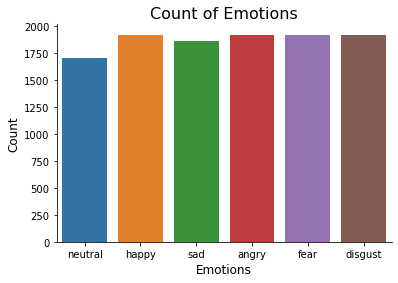

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#### 3.2 Functions for waveplot and spectogram

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

#### 3.2.1 Neutral

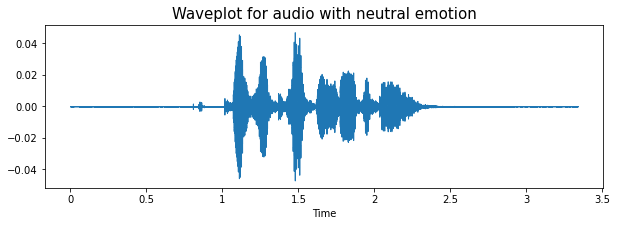

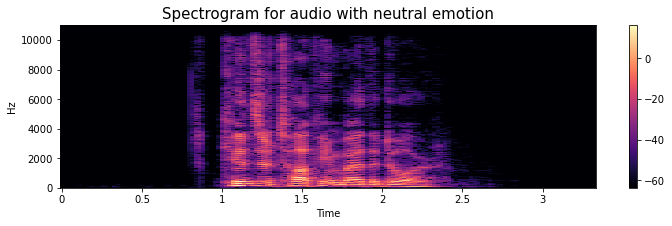

In [14]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### 3.2.2 Calm

In [15]:
#emotion='calm'
#path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
#data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
#create_spectrogram(data, sampling_rate, emotion)
#Audio(path)

#### 3.2.3 Happy

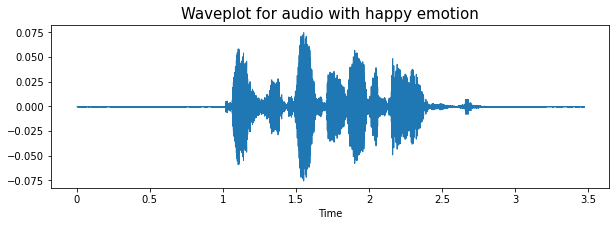

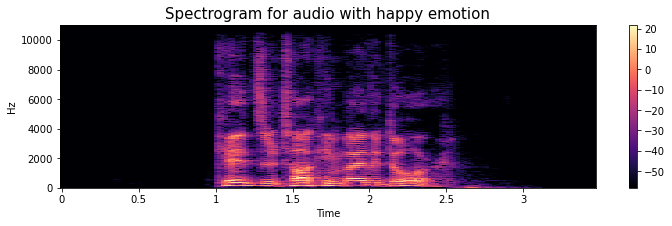

In [16]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### 3.2.4 Sad

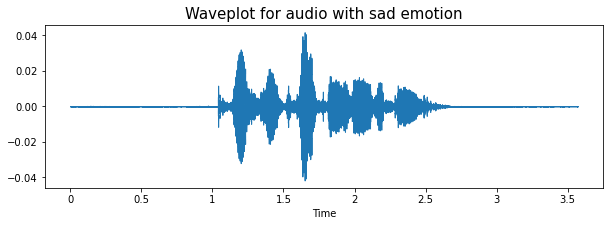

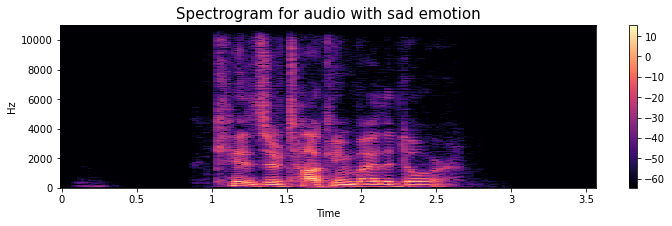

In [17]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### 3.2.5 Angry

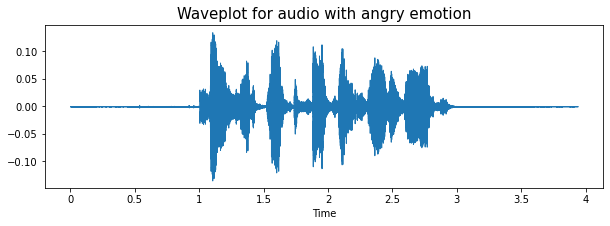

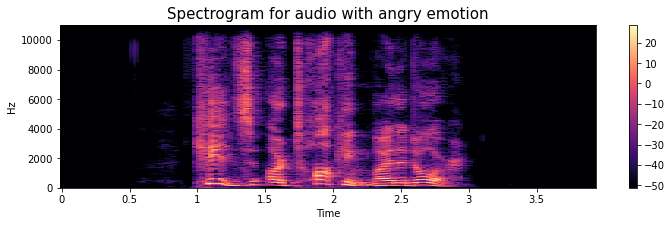

In [18]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### 3.2.6 Fear

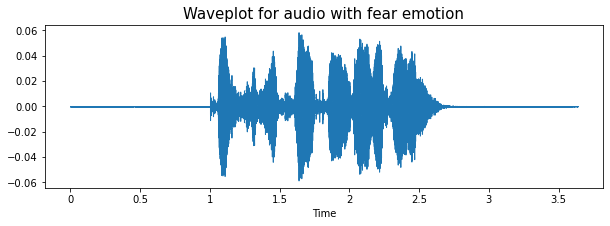

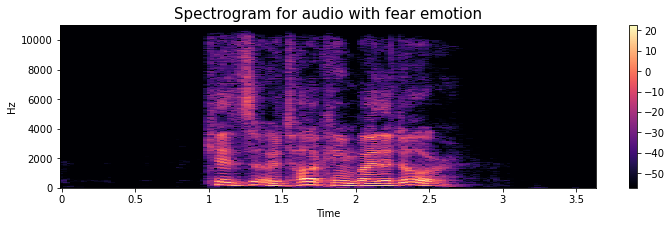

In [19]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### 3.2.7 Disgust

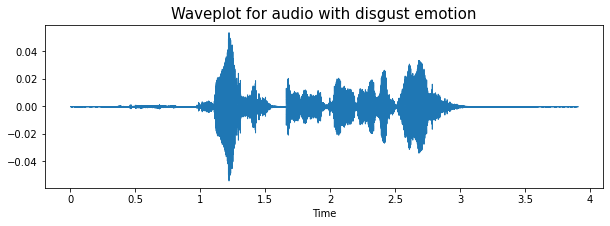

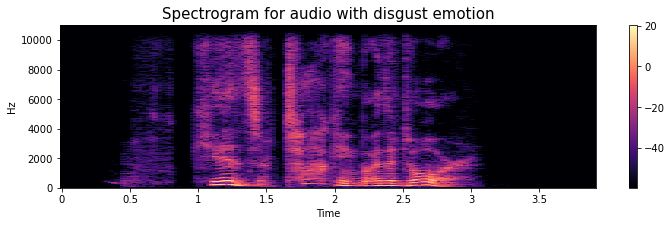

In [20]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## 4. Data Augmentation

#### Data Augmentation is used to create more synthetic samples from given instances in order to increase the sample size.

##### Time Shifting:- We have a waveform so we take certain parts of the waveform we thrn shift those parts of the waveform right and left. In audios like speech and music which are relied on time domain where order is important time shifting can be done but is unneccessary and provides very little output in terms of augmentation.

##### Time Stretching:- We have a waveform and change the speed of sound without affecting the frequency or pitch. This is helpful in our case.

##### Pitch Scaling:- Complementary of time stretching. It changes the frequency or the pitch without affecting the speed sound.

##### Noise Addition:- We add some noise which of different type like background noise, White noise or pink noise etc..

In [22]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 4.1 Orignal Audio

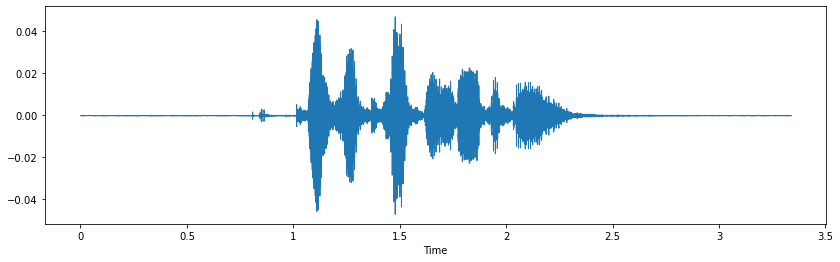

In [23]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

#### 4.2 Noise Addition

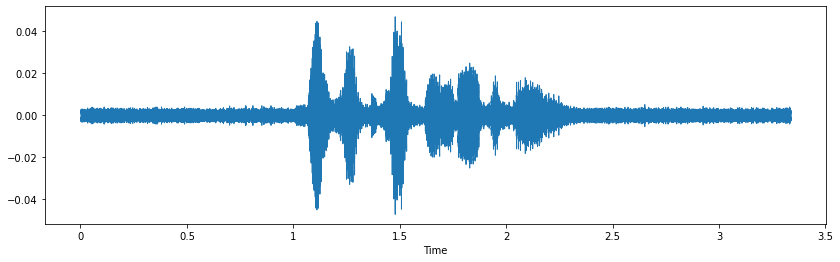

In [24]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4.3 Time Stretcing

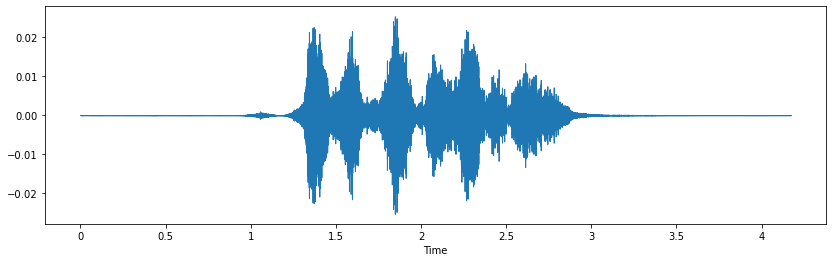

In [25]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4.4 Time Shifting

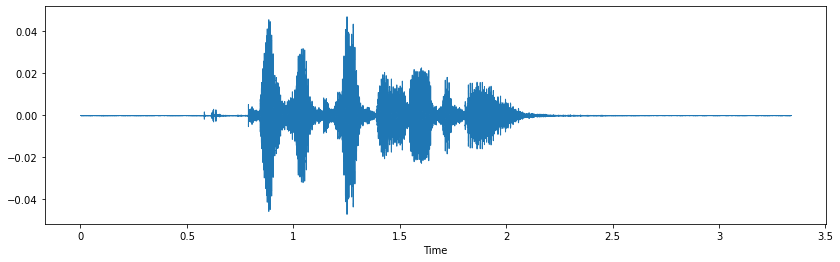

In [26]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4.5 Pitch Scaling

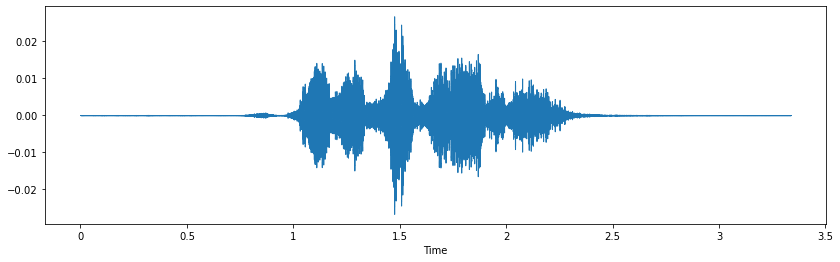

In [27]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## 5. Feature Extraction

##### 5.1.1 ZCR:- The zero-crossing rate (ZCR) is the rate at which a signal transitions from positive to zero to negative or negative to zero to positive. In our projext it used to VAD which tells when the audio sample begins from.

##### 5.1.2 Chroma_stft:- Chroma is used to capture harmonic and melodic characteristics of the music which does not change because of instrumentation. We use stft to contain all the aspects like amplitude frequency and time domain

##### 5.1.3 MFCC :- MFCC is used to extract power spectrum based features which gives number of frequency changes in a given audio samples and then perform scaling accordingly.

##### 5.1.4 RMS :- The Root Mean Square Value of the energy in an audio sample. Explain variaion of energies

##### 5.1.5 MelSpectogram :- Here a spectogram is converted to a mel scale

In [28]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

#### 5.2 Applying the feature extractions

In [29]:
x = zip(data_path.Path, data_path.Emotions)
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

## 6. Data Preperation

#### 6.1 Making sure all the augmentation are applied

In [30]:
len(X), len(Y), data_path.Path.shape

(33774, 33774, (11258,))

#### 6.2 Appending the labels

In [31]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.283226  0.739174  0.760110  0.738748  0.712194  0.687986  0.667279   
1  0.300347  0.803637  0.812094  0.785338  0.803291  0.773257  0.675746   
2  0.181467  0.629995  0.730929  0.743651  0.680889  0.670727  0.673700   
3  0.254530  0.676571  0.724970  0.725722  0.668644  0.645344  0.671470   
4  0.283221  0.738629  0.785199  0.772484  0.741828  0.742313  0.719748   

          7         8         9  ...           153           154  \
0  0.694000  0.742275  0.762594  ...  4.312694e-06  3.293364e-06   
1  0.695313  0.736051  0.773900  ...  1.981382e-05  1.941877e-05   
2  0.669033  0.709932  0.745144  ...  8.582505e-07  9.570446e-07   
3  0.631493  0.681748  0.709889  ...  6.987414e-06  7.038922e-06   
4  0.628998  0.680927  0.721524  ...  1.658812e-05  1.593760e-05   

            155           156           157           158           159  \
0  2.149553e-06  2.260914e-06  4.562520e-06  4.985617e-06  1.324619e-06   
1  1.705223e-05  1.840261e-05  2.064812e-05  2.138399e-05  1.810929e-05   
2  7.741540e-07  5.212421e-07  3.252106e-07  4.883136e-07  2.353670e-07   
3  6.659573e-06  6.937638e-06  1.117492e-05  5.767251e-06  2.024577e-06   
4  1.577845e-05  1.584890e-05  2.067429e-05  1.476390e-05  1.119035e-05   

            160           161   labels  
0  1.469305e-07  3.053402e-09  neutral  
1  1.626166e-05  1.660010e-05  neutral  
2  2.240905e-08  9.753157e-11  neutral  
3  1.944937e-07  2.701240e-09  neutral  
4  9.323913e-06  8.991307e-06  neutral  

[5 rows x 163 columns]

#### 6.3 Labels and Features Split

In [32]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

#### 6.4 Label Encoding

In [33]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

#### 6.5 Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25330, 162), (25330, 6), (8444, 162), (8444, 6))

#### 6.6 Scaling the data

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25330, 162), (25330, 6), (8444, 162), (8444, 6))

## 7. Modelling

In [36]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [37]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
396/396 [==============================] - 62s 153ms/step - loss: 1.5489 - accuracy: 0.3428 - val_loss: 1.3475 - val_accuracy: 0.4440 - lr: 0.0010
Epoch 2/50
396/396 [==============================] - 59s 149ms/step - loss: 1.3640 - accuracy: 0.4367 - val_loss: 1.3034 - val_accuracy: 0.4703 - lr: 0.0010
Epoch 3/50
396/396 [==============================] - 59s 149ms/step - loss: 1.2830 - accuracy: 0.4681 - val_loss: 1.2149 - val_accuracy: 0.4949 - lr: 0.0010
Epoch 4/50
396/396 [==============================] - 59s 148ms/step - loss: 1.2433 - accuracy: 0.4880 - val_loss: 1.1855 - val_accuracy: 0.5024 - lr: 0.0010
Epoch 5/50
396/396 [==============================] - 59s 150ms/step - loss: 1.2185 - accuracy: 0.4968 - val_loss: 1.1616 - val_accuracy: 0.5275 - lr: 0.0010
Epoch 6/50
396/396 [==============================] - 59s 150ms/step - loss: 1.1917 - accuracy: 0.5098 - val_loss: 1.1399 - val_accuracy: 0.5316 - lr: 0.0010
Epoch 7/50
396/396 [==============================] 

## 8. Report

#### 8.1 Accuracy & Train,Test loss and accuracy

264/264 [==============================] - 4s 17ms/step - loss: 1.1584 - accuracy: 0.6081
Accuracy of our model on test data :  60.812413692474365 %


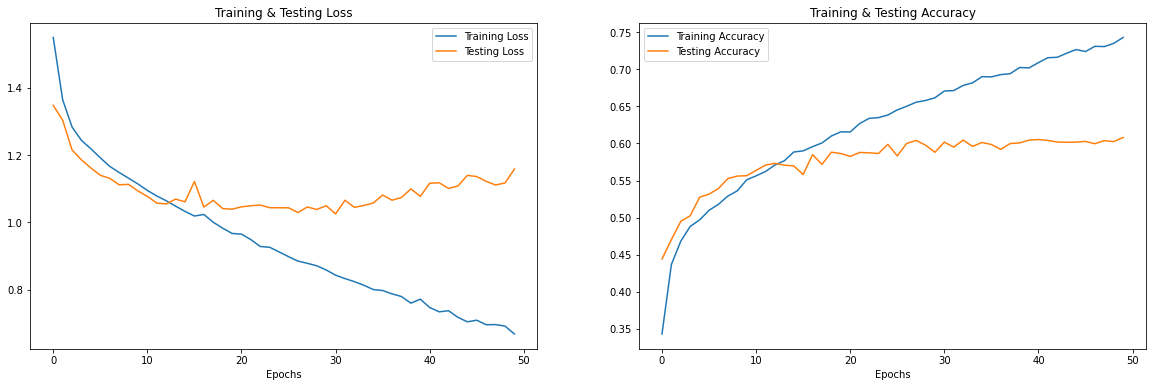

In [38]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

#### 8.2 Predicting on Test data

In [39]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

264/264 [==============================] - 5s 18ms/step


In [40]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

#### 8.3 Confusion Matrix

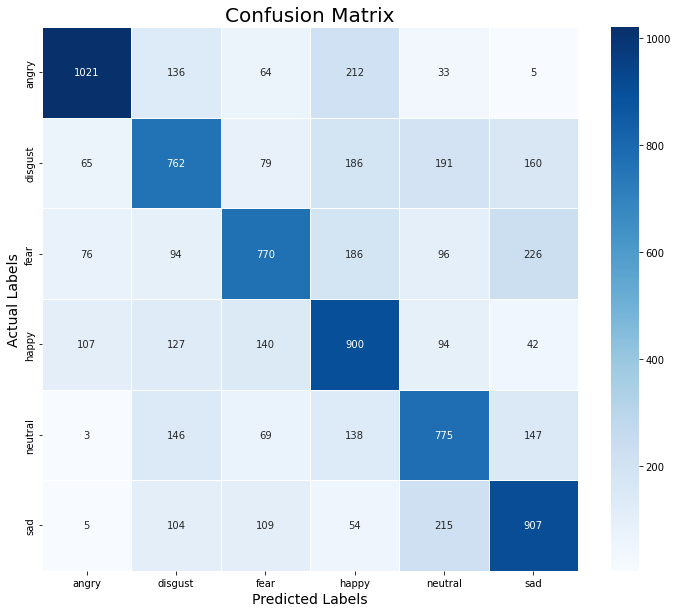

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

#### 8.4 Final Report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.80      0.69      0.74      1471
     disgust       0.56      0.53      0.54      1443
        fear       0.63      0.53      0.57      1448
       happy       0.54      0.64      0.58      1410
     neutral       0.55      0.61      0.58      1278
         sad       0.61      0.65      0.63      1394

    accuracy                           0.61      8444
   macro avg       0.61      0.61      0.61      8444
weighted avg       0.62      0.61      0.61      8444



## 9. Predictions

#### 9.1 Prediction Report on Test data

In [43]:
df.head(50)

Predicted Labels Actual Labels
0           disgust       disgust
1              fear          fear
2               sad           sad
3           neutral       disgust
4           disgust       neutral
5               sad           sad
6              fear          fear
7              fear         angry
8              fear          fear
9              fear          fear
10          disgust         angry
11            happy          fear
12            angry         angry
13          disgust           sad
14            happy          fear
15            happy         happy
16          neutral           sad
17              sad           sad
18             fear          fear
19            angry          fear
20             fear          fear
21              sad           sad
22            happy       disgust
23              sad       disgust
24          neutral       neutral
25            happy         happy
26            happy         happy
27            happy         happy
28            happy          fear
29            angry         angry
30            happy         happy
31            angry         angry
32          disgust         angry
33             fear          fear
34            angry         angry
35          neutral       neutral
36          disgust         happy
37             fear         happy
38          disgust       disgust
39            angry         angry
40            happy         happy
41              sad       disgust
42            angry         angry
43          disgust          fear
44            angry         angry
45            angry         angry
46          disgust       neutral
47          neutral       neutral
48              sad          fear
49             fear         happy

#### 9.2 Feature Extraction on recorded audio

In [44]:
def test_extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def test_get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = test_extract_features(data)
    result = np.array(res1)
    return result

#### 9.3 Predictng on recorded audio

In [50]:
filename="TestAudio/Fear.wav"
Audio(filename)
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
test_features = test_get_features(filename)
test_features=test_features.reshape(1,-1)
predicted_label=model.predict(test_features)
prediction_class = encoder.inverse_transform(predicted_label) 
print(prediction_class)

Audio(filename)

1/1 [==============================] - 0s 23ms/step
[['fear']]
